<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Wasserstein_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wasserstein GAN**

논문 링크: https://arxiv.org/abs/1701.07875

먼저, 해당 논문은 기존 GAN의 **loss function**에 focus를 했다. 

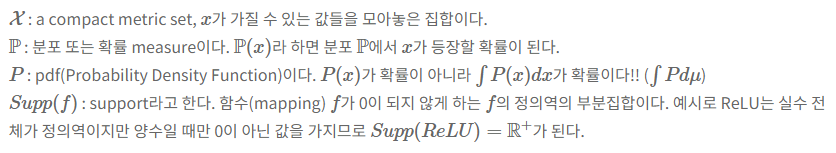

때문에 수식이 많이 나오는데, notation이 다른 경우 notation을 이해하는데에도 시간을 꽤나 쓴다. 위의 이미지에 있는 notation을 참고하겠다.

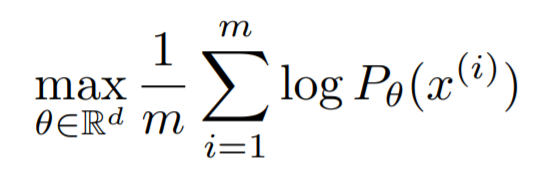

대표적인 예제 Maximum Likelihood Estimation(MLE)의 식은 위와 같다. θ로 parameterized된 분포들의 모임 (Pθ)(θ∈R^d)가 있을 때, 실제로 수집된 sample {x^(i)}m,i=1에 대해 식의 의미를 표현하면, "Data 덩어리 𝛘를 가장 잘 표현하는 분포 Pθ를 찾아라"가 된다. 이는 KL divergence를 최소화하는 것과 동치라고 한다.

하지만 P(x)의 식을 직접 표현하는 것은 어렵기 때문에(이미 정답을 알고 있다는 의미가 된다.), GAN에서는 x를 결정하는 latent variable z의 분포를 가정하여 입력으로 대입하고, discriminator와 generator간의 관계를 학습시킴으로써 generator의 분포를 P(x)에 가깝게 학습시키고자 한다.

그러나 이때 discriminator와 generator간의 균형을 유지하며 학습하기 어렵고, 학습이 완료된 이후에도 mode dropping이 발생한다. 이런 문제가 발생하는 원인은 discriminator가 선생님 역할을 충분히 하지 못하여 모델이 최적점까지 학습되지 못한다.

Wasserstein GAN(WGAN)에서는 이런 문제들을 해결하기 위해 기존의 GAN과 비교하여
- discriminator 대신 새로 정의한 critic을 사용한다. discriminator는 가짜/진짜를 판별하기 위해 sigmoid를 사용하고, output은 가짜/진짜에 대하 예측 확률 값이다.
- 반면 critic은 EM(Earth Mover) distance로 부터 얻은 scalar 값을 이용한다.
- EM distance는 확률 분포 간의 거리를 측정하는 척도 중 하나인데, 그 동안 일반적으로 사용된 척도는 KL divergence이다. KL divergence는 매우 strict하게 거리를 측정하는 방법이라, continuous하지 않은 경우가 있어 학습하기 어렵다.

위와 같은 차이점들을 뒀다.

결과적으로, GAN의 discriminator보다 선생님 역할을 잘 수행할 수 있는 critic을 사용함으로써 gradient를 잘 전달시키고, critic과 generator를 최적점까지 학습할 수 있다는 것이다.

- training 시 discriminator와 generator간의 balance를 주의깊게 살피고 있지 않아도 된다.
- GAN에서 일반적을 발생되는 문제인 mode dropping을 해결한다.

덕분에 위와 같은 이점을 얻는다.

## **Different Distances**



### **1. Total Variation (TV) distance**

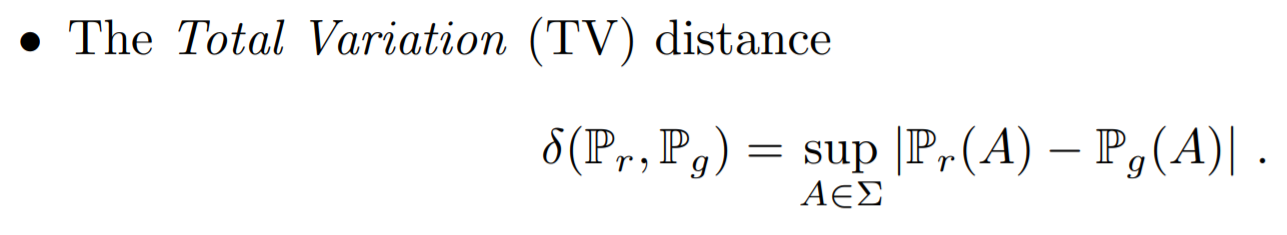

두 확률 분포의 측정값이 벌어질 수 있는 가장 큰 값이다. 

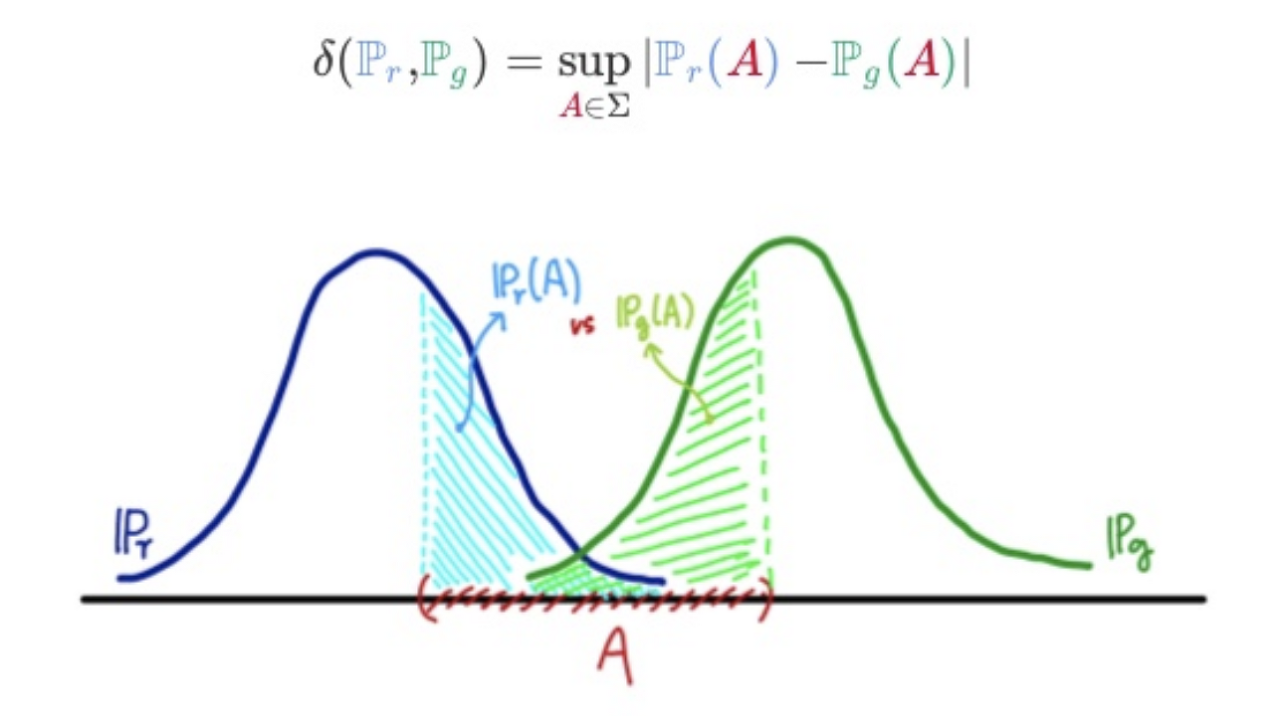

위 그림을 참고하면 쉽게 이해할 수 있는데, 빨간색 A 영역안에 있는 A들을 대입할때, Pr(A)와 Pg(A)의 값의 차 중 가장 큰 것을 의미한다.

### **2. Kullback-Leibler (KL) divergence**

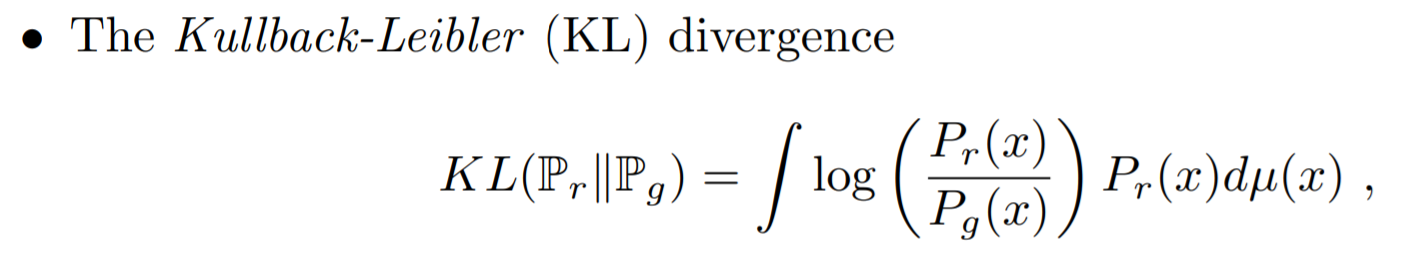

(링크: https://github.com/viriditass/Miscellaneous/blob/main/Information_Theory.ipynb)

### **3. The Jensen-Shannon (JS) divergence**

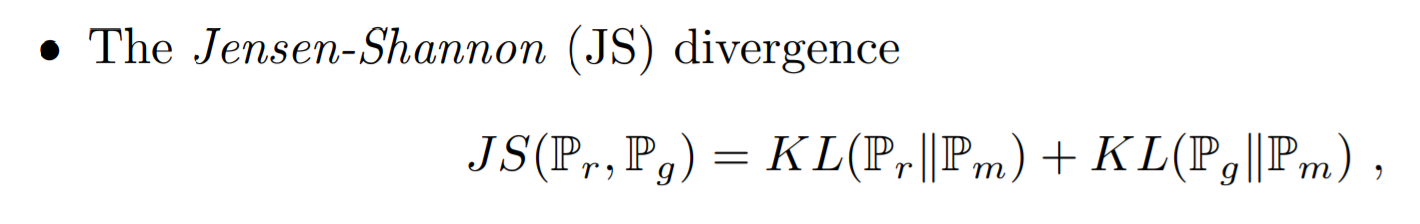

(링크: https://github.com/viriditass/Miscellaneous/blob/main/Information_Theory.ipynb)

### **4. Earth-Mover (EM) distance or Wasserstein-1**

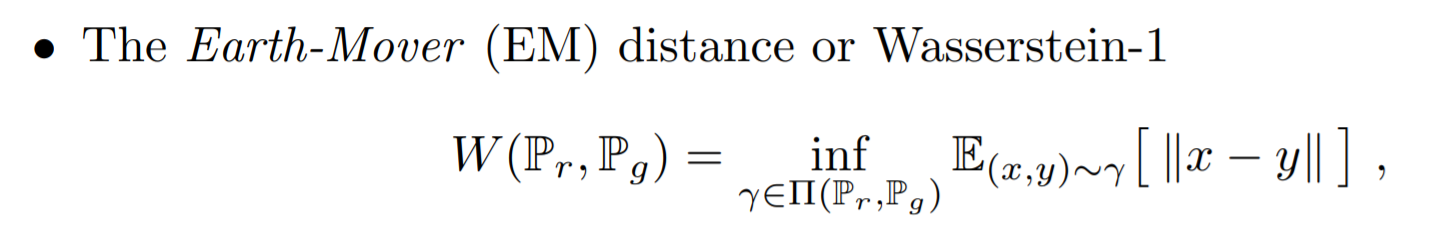

두 확률 분포의 결합확률분포 Π(Pr, Pg)중에서 d(X,Y) (x와 y의 거리)의 기댓값을 가장 작게 추정한 값이다.

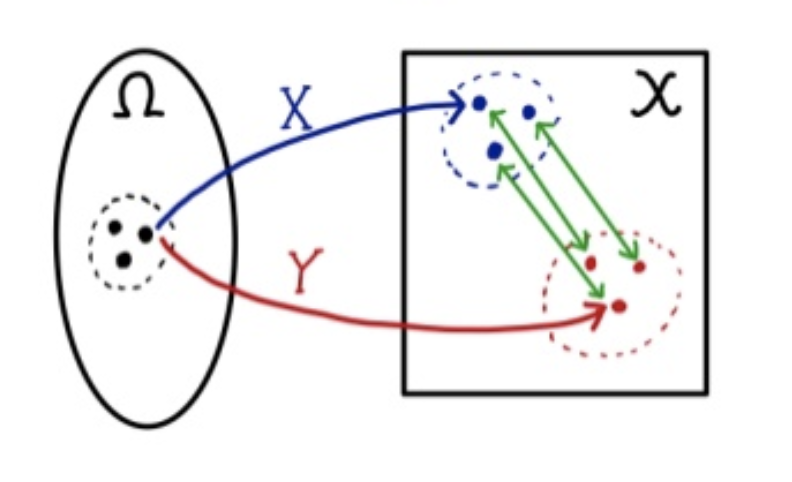

위 그림을 참고하면 쉽게 이해할 수 있다 그림에서 각각 파란색 원이 X의 분포, 빨간색 원이 Y의 분포, 𝛘가 결합 확률 분포를 의미한다. 그리고 초록색 선의 길이가 ||x-y||를 의미하는데, 즉 초록색 선 길이들의 기댓값을 가장 작게 추정한 값이다.

Distance 함수들을 살펴봤는데, 논문의 저자는 EM distance의 타당성을 주장했다.

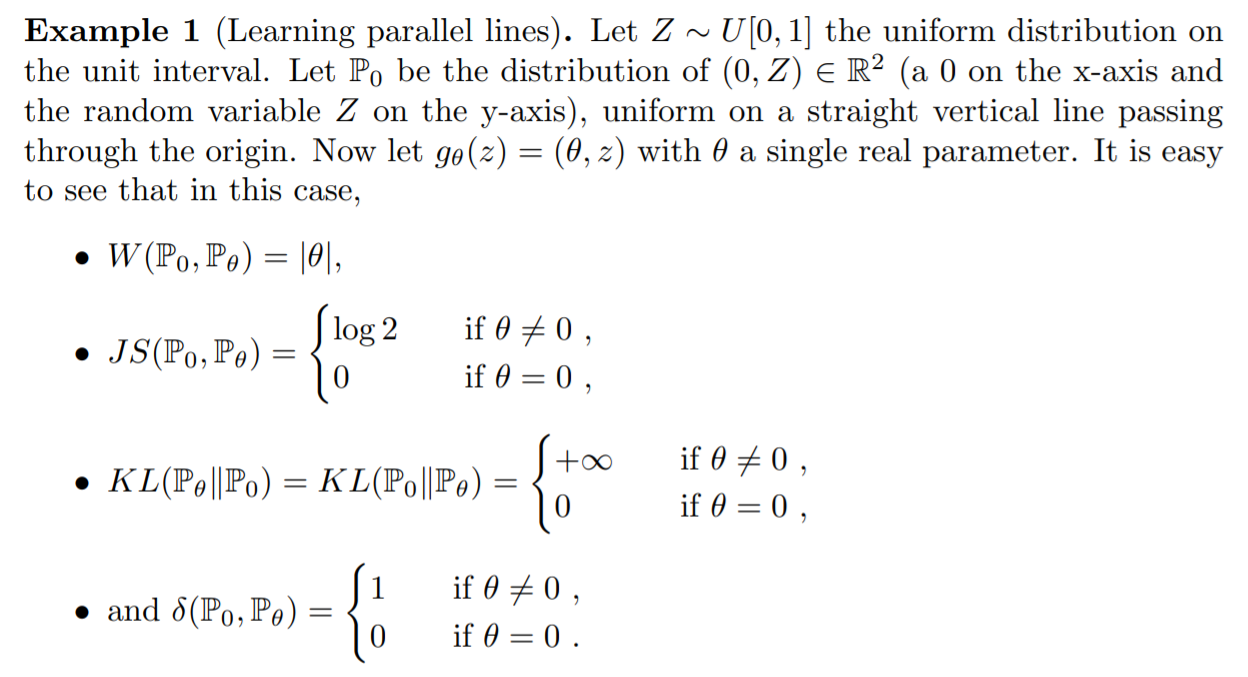

위의 Example 1은 임의의 distribution P0과 Pθ를 정의하고, 이들 간의 확률 거리를 구한 것이다. 결과를 보면 알 수 있듯이 Wasserstein(=EM distance)의 경우는 θ에 관계없이 일정한 수식을 가진다. (다른 거리의 경우 θ에 따라 거리가 달라지는 것 뿐만 아니라 그 값이 상수 또는 무한대이다.)

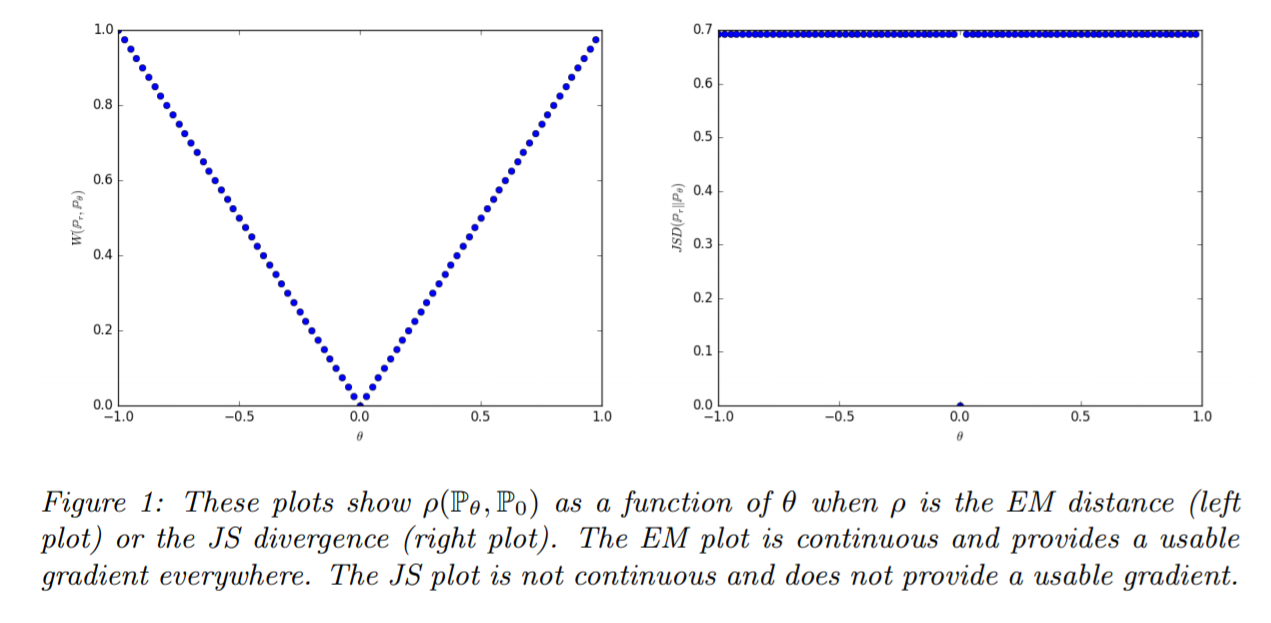

위의 그림 Figure 1은 위의 Example 1에서 나온 결과를 그림으로 보여준 것이다. 즉, 정리하자면 **KL/JS divergence나 TV의 경우는 두 분포가 서로 겹치는 경우에는 0이지만, 겹치지 않는 경우는 무한대 또는 상수와 같이 극단적인 값을 나타낸다.** 이는 discriminator와 generator가 분포를 학습할 때 위 3가지 distance를 기반으로 학습시 어려움을 겪을 것이라는 것을 알게 해준다. 이와 대조적으로, **Wassersetein(=EM distance)의 경우는 분포가 겹치던 안겹치던 |θ|이 유지되므로, 학습시 사용하기 쉽다.**

## **EM distance**

EM distance를 사용하기 위해선 제약 조건이 붙는다. 바로 미분이 가능해야한다.

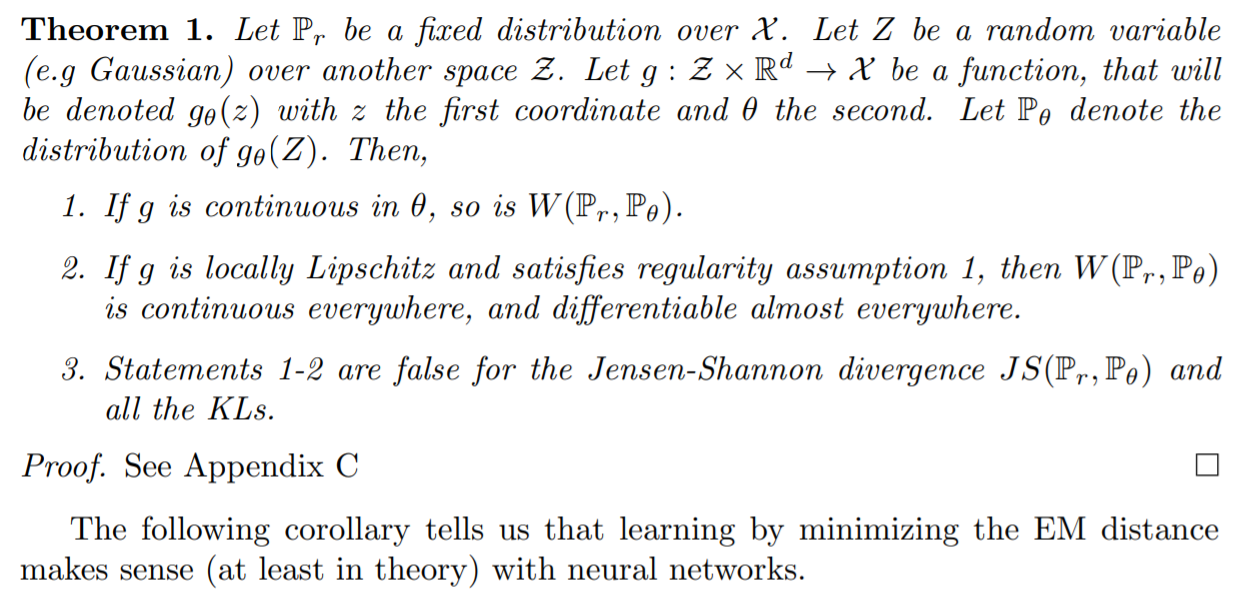

위의 정리 Theorem 1을 보겠다. Pr은 학습하고자 하는 목표 distribution이며, Pθ는 학습시키고 있는 현재의 distribution이다. z는 latent variable space이며, function g는 z를 x로 mapping하는 함수다. 이때 gθ(z)의 distribution이 Pθ가 된다.

1. g가 θ에 대해 연속한다면, Pr과 Pθ의 EM distance 또한 연속한다.
2. g가 Lipschitz 조건을 만족하면, Pr과 Pθ의 EM distance 또한 연속한다.

(**Lipshitz 조건이란? 두 점 상의 거리를 일정 비 이상으로 증가시키지 않는 함수**)

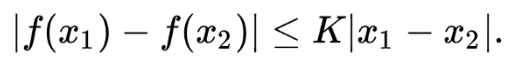

위 수식을 보면 쉽게 이해할 수 있는데, 이 Lipschitz 조건을 만족시키기 위해 아래 3절에서 계속 clipping을 해준다.

## **Wasserstein GAN 구조**

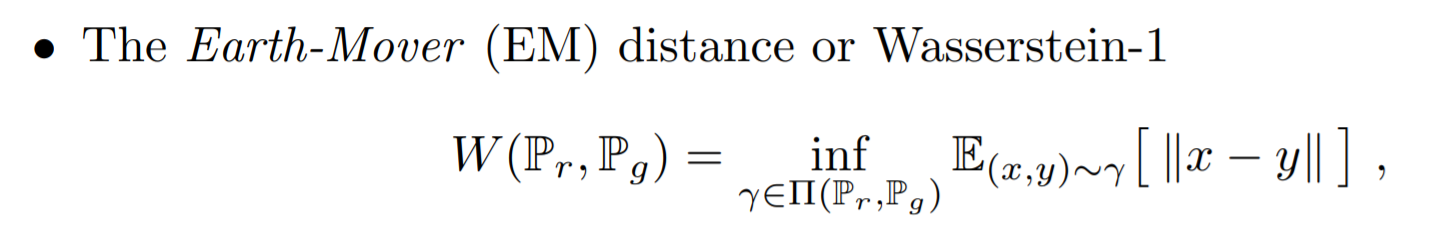

이제 원래 Loss function에서 계산해야 할 것이 위의 식이였다면, 해당 inf 부분을 계산할 수가 없다. Pr과 Pg의 joint distribution을 계산해야 하는데, Pr은 우리가 알려고 하는 대상이기 때문이다.

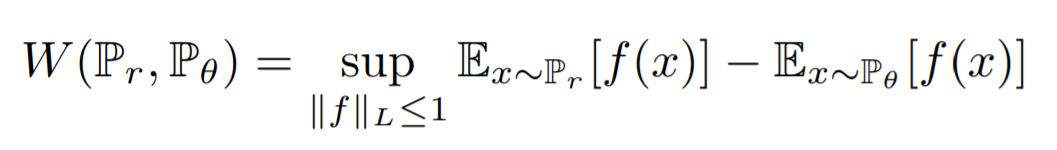

따라서 **Kantorovich-Rubinstein duality**를 이용하여 식을 바꾸면 위와 같은 식이 나온다.

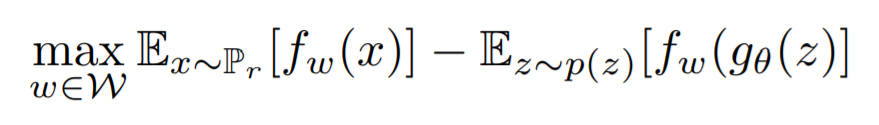

이것을 학습시키기 위해 parameter가 추가된 f로 수식을 바꾸고, Pθ를 g(θ)에 대한 식으로 바꿔면. 위와 같은 식이 된다.(Original GAN의 Loss와 상당히 유사하다.) 하지만, 또 Pr이 식에 있는 것이 보인다. 그러면 어떻게 할까?

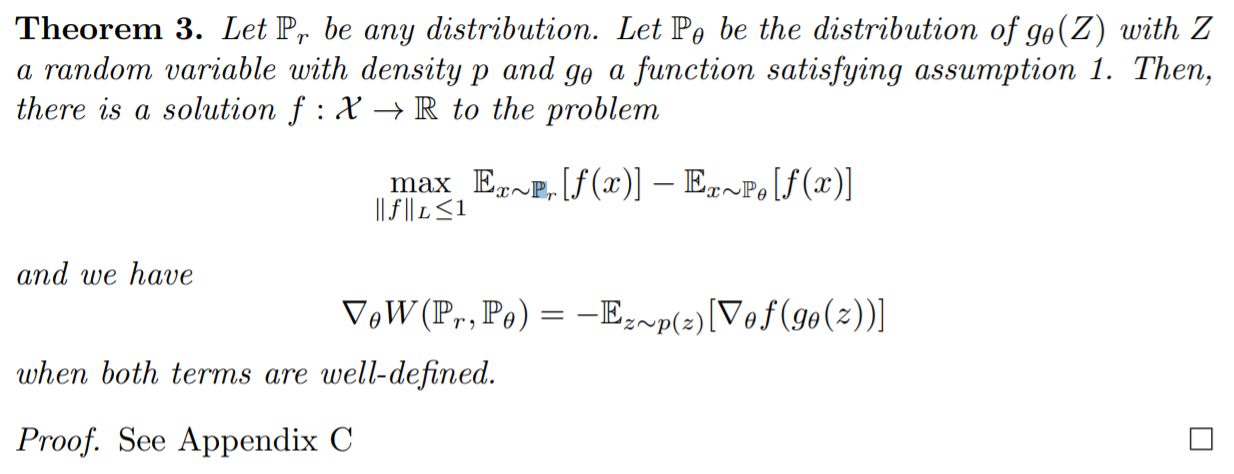

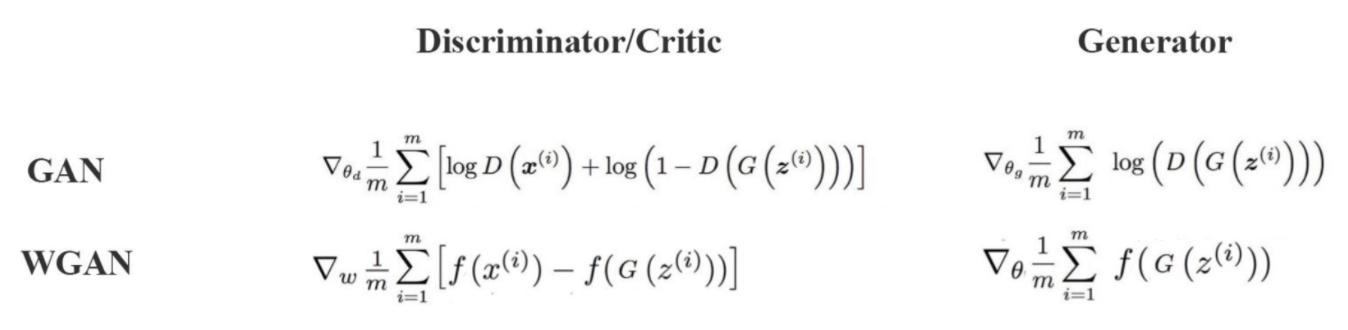

위의 사진은 GAN과 WGAN의 차이를 보여주는 사진이다. 앞의 항은 잘 학습된 discriminator(사실은 critic)가 Pr의 역할을 하며, 위의 Theorem 3처럼 gradient update를 할 때에는 θ에 대해 미분하면 앞의 항이 사라진다. 즉, **f(x)는 Lipschitz 조건을 만족하는 함수로, discriminator 역할을 하는 함수이다. (=critic)**

앞서 보아왔듯이 critic의 loss function 항 자체가 EM distance(Wasserstein distance)를 의미하므로, 위 loss function를 최대화(최대화하는 이유: Kantorovich-Rubinstein duality를 통해 sup으로 변형된다. 이후 parameter 식으로 변형하면서 maximize로 바뀐다.)하는 함수 f를 찾는 문제가 된다. 여기서 w는 함수 f의 parameter, 즉 critic의 parameter이므로 w에 대한 **gradient ascent**이다.

generator의 loss function 역시 위의 정리 Theorem 3에서 정의한 것처럼 변형한 Wasserstein distance 식을 θ에 대해 미분하여 앞의 식을 사라지게 하면 얻을 수 있다. generator의 경우, 위의 정리 Theorem 3의 미분 결과에서 알 수 있듯이 앞에 -가 붙여있다. 즉, θ에 대한 **gradient descent**이다.

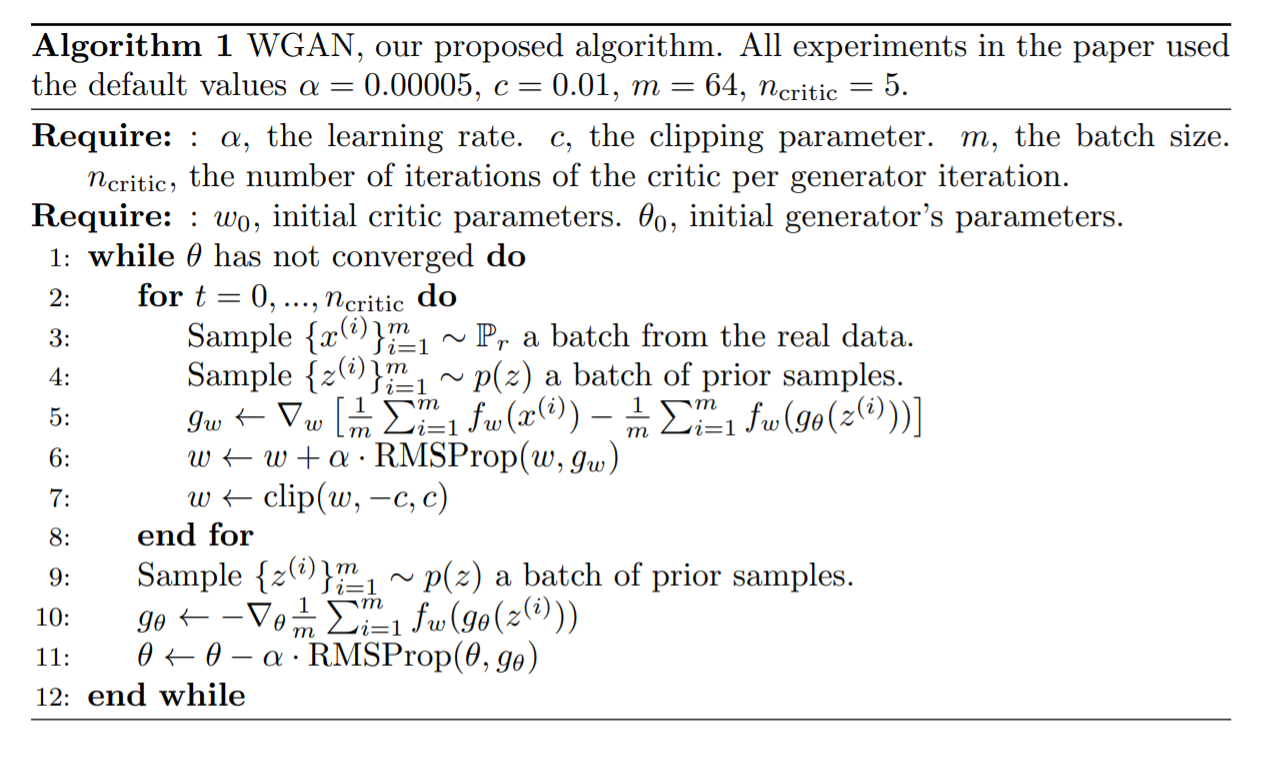

위 **Algorithm 1은 WGAN의 최종적인 train 알고리즘**이다. 먼저 n critic번만큼 critic을 학습시키는 부분이 보이는데, Pr과 p(z)를 mini-batch만큼 sampling 후에, critic의 loss function을 이용하여 parameter w(= 함수 f)를 update한다.

여기서 update 후 clip(w, -c, -c)라는 부분이 있는데, Lipschitz 조건을 만족하도록 parameter w가 [-c, c] 공간 안쪽에 존재하도록 하는 것이다. 이를 **Weight clipping**이라고 한다.

**이게 바로 WGAN의 한계점인데... 만일 clipping parameter c가 크면 limit(c 혹은 -c)까지 도달하는 시간이 매우 오래 걸리기 때문에, optimal 지점까지 학습시키는데 오래 걸린다. 반대로 c가 작은 경우는 gradient vash 문제가 발생한다. 또한, clipping의 문제점이 더 있는데, 바로 regularizer로써 작용하여 함수 f의 capacity를 줄인다는 것도 있다.**

이러한 문제점을 보완한 것이 바로 **WGAN-GP**인데, 이는 다음 WGAN-GP 논문에서 설명하도록 하겠다.

### **Discriminator vs Critic**

discriminator의 경우, 일반적인 분류 neural net과 같이 이미지가 진짜인지, 가짜인지 sigmoid 확률값으로 판별한다. 

반면, critic의 경우 Wasserstein GAN 식 자체를 사용하기 때문에, scalar값이 output이다. 이는 이미지가 진짜인지 가짜인지에 대한 점수를 의미하는 것이므로, sigmoid와 달리 포화(saturation) 현상이 없으며 좋은 gradient를 만들어낸다.

정리하자면, 진짜 optimal 지점까지 쉽게 학습이 가능하며 기존 GAN의 문제점인 **1. discriminator와 generaotr간의 balance 맞추기**, **2. mode dropping (mode collapse) 문제**를 모두 해결한 것이다.

### **Why RMSProp??**

위의 Argorithm 1을 보면 RMSprop을 사용했다. 이 부분에서 왜 Adam 같은 다른 optimizer를 안쓰고 RMSprop를 사용했는지 궁금할 수 있다.

그 이유는 critic을 학습할 때 Adam과 같은 mometum 베이스 optimizer를 사용할 시 학습이 unstable하다는 것이다.

이 원인을 좀 더 자세히 설명하자면, loss 값이 튀고 sample이 좋지 않는 경우(보통 학습 초반) Adam이 가고자 하는 방향, 즉 이전에 기억했던 방향(Adam step)과 gradient의 방향 간의 cosine 값이 음수가 된다. 일반적으로 nonsationary 문제(극한값이 존재 하지 않는 경우)에 대해서는 momentum 계열보다 RMSProp 성능이더 좋다.

### **Pytorch**

## **Empirical Results**

### **Experimental Procedure**

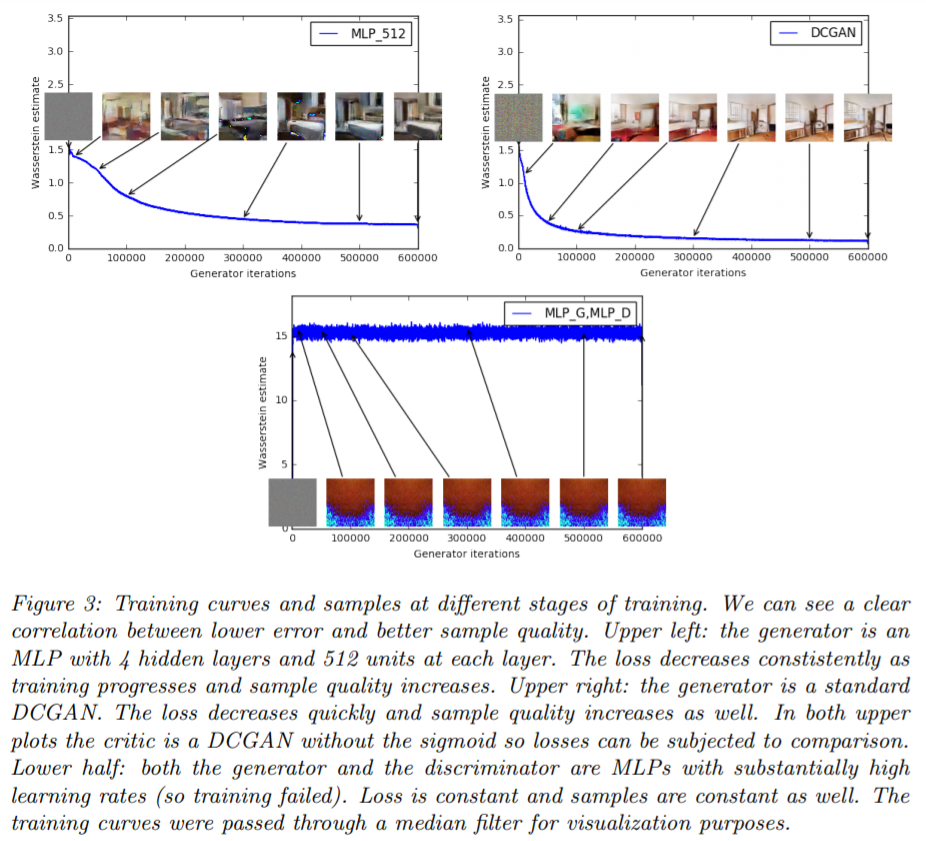

위의 그림 Figure 3에서 맨 위의 그래프들은 discriminator 대신 critic을 적용한 것이며, 해당 그래프들중 왼쪽 부분은 generator로 Multi Layer Perceptron, 오른쪽은 DCGAN을 이용한 결과다. sigmoid를 사용하지 않아 wasserstein 거리가 점차적으로 줄어들고, sample의 결과도 훨씬 좋아진 것을 알 수 있다.

아래의 그래프는 discriminator와 generator 모두 MLP를 사용한 결과다. Smaple 그림은 무엇인지 알아보기 어렵고, 각 sample에 대해 wasserstein distance를 계산하여 보았을 때 상수값으로 변하지 않는 것을 알 수 있다.

### **Meaningful loss metric**

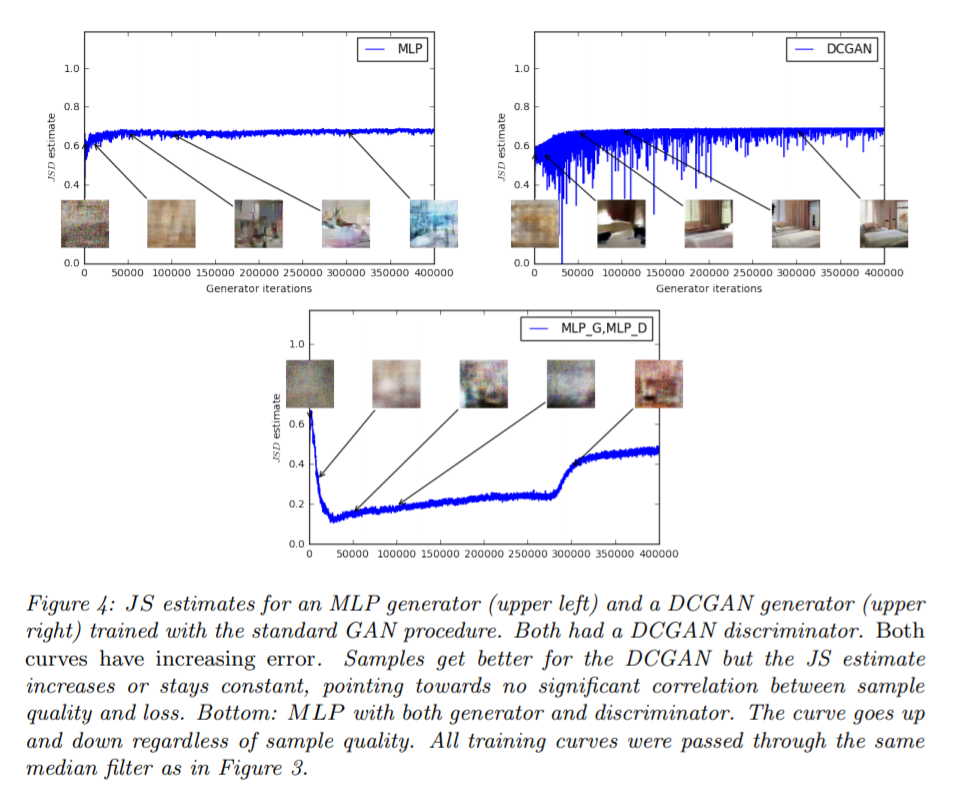

위 그림 Figure 4는 위 Figure 3과 같은 모델 구조인 (critic + MLP), (critic + DCGAN), (MLP + MLP)를 사용하였지만, generator iteration마다 JS 거리를 측정하여 그래프를 측정한 결과를 보여준 것이다. sample quality가 좋아져도 JS는 증가하거나 상수 값을 그대로 유지하는 것을 볼 수 있다. 이는 즉 EM distance를 잘 사용한 것이다. **WGAN은 GAN 역사상 최초로 수렴(convergence)한 모습을 보여 준 경우였다고 한다.**

### **Improved stability**

아래 실험들은 DCGAN generator를 이용하고, 다양한 변화를 주며 실험하여 discriminaotr와 critic의 성능을 비교했다.

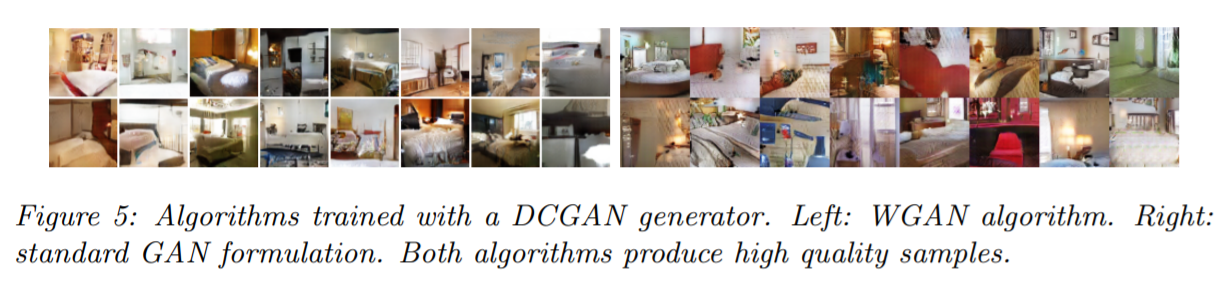

위 사진 Figure 5는 일반적인 GAN과 WGAN으로 이미지를 생성한 결과다. (둘다 DCGAN generator 사용) 둘 다 조은 질의 sample을 생성했다.

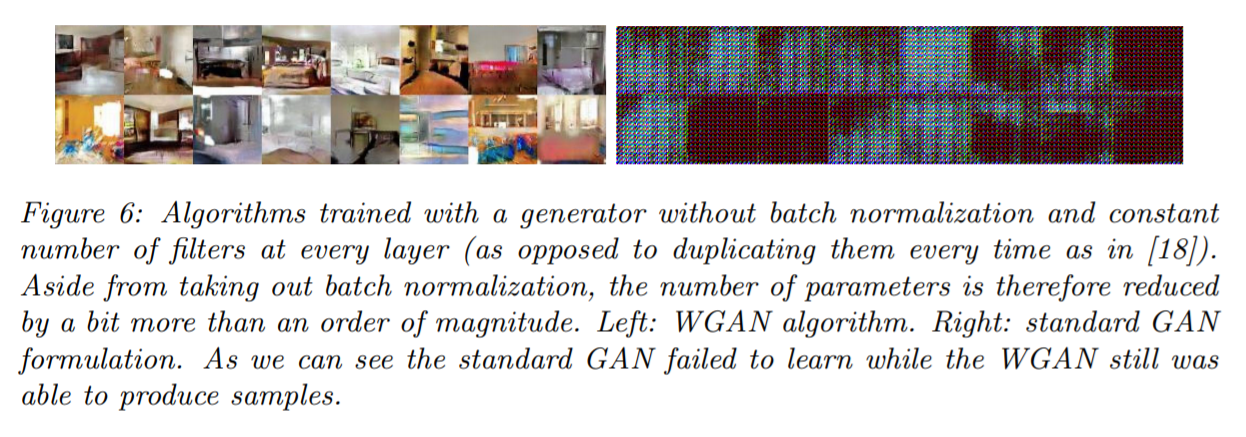

위 사진 Figure 6은 batch normalization을 없애고 generator의 DCGAN 부분에서 filter 수를 고정함으로써 전체적으로 parameter 수를 줄인 결과다. WGAN에서는 여전히 잘 작동하는 반면, 일반적인 GAN은 그렇지 않은 결과를 알 수 있다.

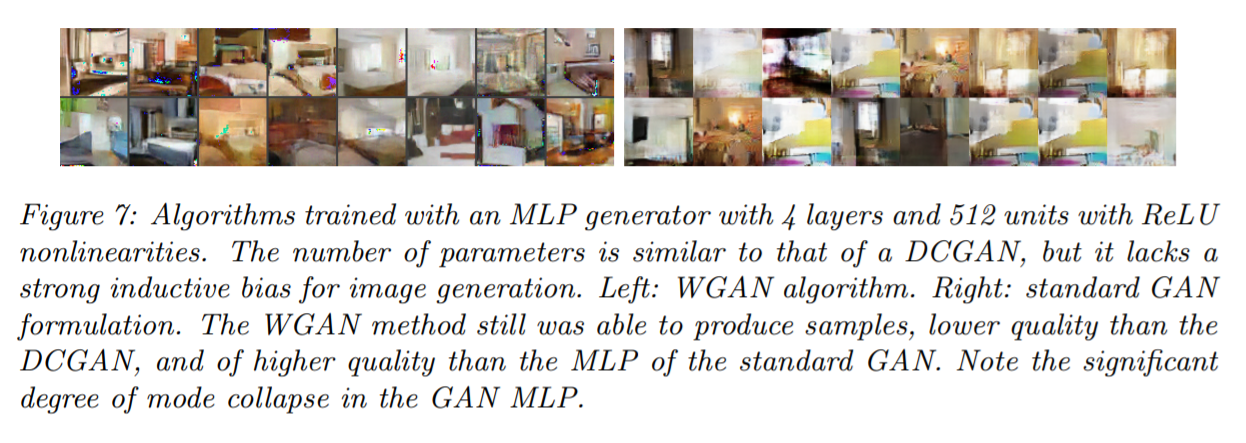

위 사진 Figure 7은 generator를 MLP + ReLU로 변형하여 실험한 결과다. 왼쪽은 WGAN, 오른쪽은 일반적인 GAN의 결과인데, DCGAN을 사용할때보다 퀄리티는 떨어졌지만 mode collapse 현상에 대해 비교할 수 있다. 오른쪽의 경우 그림이 많으며 특정 그림에 대해서는 생성을 못했지만, 반면 왼쪽의 경우는 다양한 그림을 비슷하게 생성했다.

결론적으로 **discriminator와 critic간의 balance를 더 이상 신경쓰지 않아도 되며,뿐만아니라 WGAN 알고리즘을 사용했을때 mode collapse 현상이 발생하지 않았다.**